In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('../../data/PimaIndiansDiabetes.csv')

# diabetes Integer 형식으로 변경 pos = 1, neg = 0
label = {'diabetes' : {"pos" : 1, "neg" : 0}}
df = df.replace(label)

print(df)

df_X = df.loc [:, df.columns != 'diabetes']
df_y= df['diabetes']

train_X , test_X , train_y , test_y = train_test_split(df_X , df_y , test_size = 0.3, random_state = 1234)


     pregnant  glucose  pressure  triceps  insulin  mass  pedigree  age  \
0           6      148        72       35        0  33.6     0.627   50   
1           1       85        66       29        0  26.6     0.351   31   
2           8      183        64        0        0  23.3     0.672   32   
3           1       89        66       23       94  28.1     0.167   21   
4           0      137        40       35      168  43.1     2.288   33   
..        ...      ...       ...      ...      ...   ...       ...  ...   
763        10      101        76       48      180  32.9     0.171   63   
764         2      122        70       27        0  36.8     0.340   27   
765         5      121        72       23      112  26.2     0.245   30   
766         1      126        60        0        0  30.1     0.349   47   
767         1       93        70       31        0  30.4     0.315   23   

     diabetes  
0           1  
1           0  
2           1  
3           0  
4           1  
.. 

In [2]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(train_X, train_y)


print('Decision Tree Train accuracy :',model.score(train_X, train_y))
print('Decision Tree Test accuracy :',model.score(test_X, test_y))

Decision Tree Train accuracy : 1.0
Decision Tree Test accuracy : 0.7142857142857143


In [3]:
from sklearn import svm


model = svm.SVC()
model.fit(train_X, train_y)

print('SVM Train accuracy :',model.score(train_X, train_y))
print('SVM Test accuracy :',model.score(test_X, test_y))

SVM Train accuracy : 0.7746741154562383
SVM Test accuracy : 0.7402597402597403


In [4]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(train_X, train_y)

print('Random Forest Train accuracy :',model.score(train_X, train_y))
print('Random Forest Test accuracy :',model.score(test_X, test_y))

Random Forest Train accuracy : 1.0
Random Forest Test accuracy : 0.7532467532467533


In [29]:
accuracy =[]
model_name = ['linear', 'poly', 'rbf', 'sigmoid']

for mod in model_name:
        
    model = svm.SVC(kernel=mod)
    model.fit(train_X, train_y)

    accuracy.append(model.score(test_X, test_y))

    print(f'SVM kernel {mod} Train accuracy : {model.score(train_X, train_y)}')
    print(f'SVM kernel {mod} Test accuracy : {model.score(test_X, test_y)}\n')


SVM kernel linear Train accuracy : 0.7821229050279329
SVM kernel linear Test accuracy : 0.7575757575757576

SVM kernel poly Train accuracy : 0.7821229050279329
SVM kernel poly Test accuracy : 0.7229437229437229

SVM kernel rbf Train accuracy : 0.7746741154562383
SVM kernel rbf Test accuracy : 0.7402597402597403

SVM kernel sigmoid Train accuracy : 0.5027932960893855
SVM kernel sigmoid Test accuracy : 0.5021645021645021



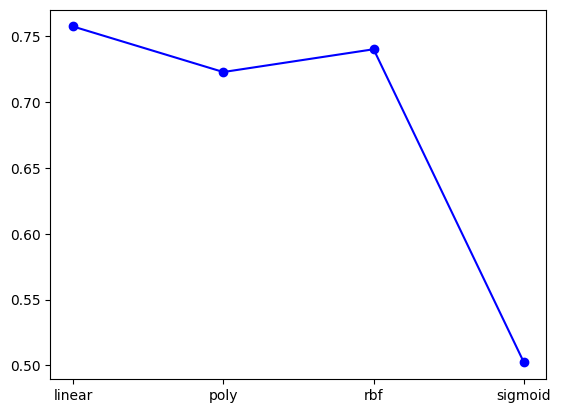

In [30]:
from matplotlib import markers
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)

plt.plot(model_name, accuracy, color = 'blue', marker = 'o')
plt.show()

In [19]:
estimate = [100, 200, 300, 400, 500]
max_feat = [1, 2, 3, 4, 5]

label = []
accuracy = []

def max(max, accuracy):
    if accuracy > max:
        return accuracy
    return max

for feat in max_feat:
    for est in estimate:
        model = RandomForestClassifier(n_estimators=est, max_features=feat)
        model.fit(train_X, train_y)
        label_str = str(est) +"/"+ str(feat)
        label.append(label_str)
        accuracy.append(model.score(test_X, test_y))
        print(f'n_estimators = {est}, max_features = {feat} : {model.score(test_X, test_y)}')

        
        

Random Forest Train accuracy : 1.0
n_estimators = 100, max_features = 1 : 0.7619047619047619
n_estimators = 200, max_features = 1 : 0.7532467532467533
n_estimators = 300, max_features = 1 : 0.7532467532467533
n_estimators = 400, max_features = 1 : 0.7662337662337663
n_estimators = 500, max_features = 1 : 0.7619047619047619
n_estimators = 100, max_features = 2 : 0.7445887445887446
n_estimators = 200, max_features = 2 : 0.7575757575757576
n_estimators = 300, max_features = 2 : 0.7619047619047619
n_estimators = 400, max_features = 2 : 0.7489177489177489
n_estimators = 500, max_features = 2 : 0.7532467532467533
n_estimators = 100, max_features = 3 : 0.7575757575757576
n_estimators = 200, max_features = 3 : 0.7489177489177489
n_estimators = 300, max_features = 3 : 0.7489177489177489
n_estimators = 400, max_features = 3 : 0.7489177489177489
n_estimators = 500, max_features = 3 : 0.7619047619047619
n_estimators = 100, max_features = 4 : 0.7445887445887446
n_estimators = 200, max_features = 4 

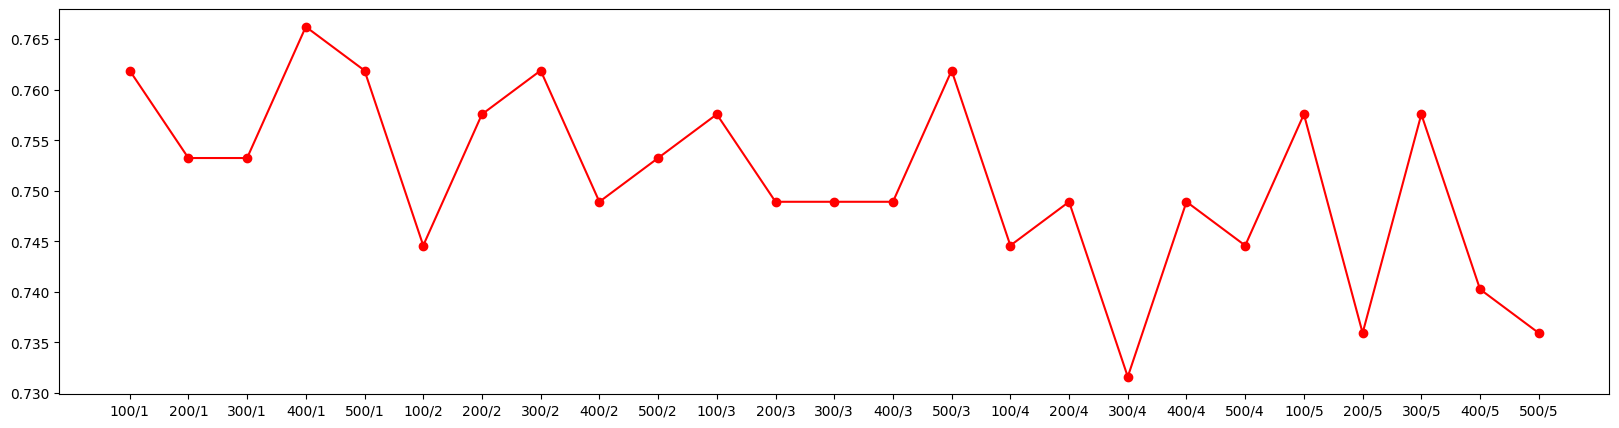

In [20]:

plt.figure(figsize=(20,5))
plt.plot(label, accuracy, color = 'red', marker='o')
plt.show()